# Connect to downstream Gene Ontology terms.

This notebook showcases the functionality of Omniflow that connects the existing nodes of a network to a phenotype of interest. 

In [1]:
%%time
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op

CPU times: user 1.84 s, sys: 424 ms, total: 2.27 s
Wall time: 2.65 s


### 1. Build network

Please see the [Network building](https://omniflow-project.readthedocs.io/en/latest/notebooks/network_building.html) tutorial for detailed explanations of each step.

In [5]:
genes = ["SRC", "NOTCH1", "FAK"]

In [6]:
new_net1 = Network(genes)

In [7]:
%%time
new_net1.connect_nodes(only_signed=True, consensus_only=True)

CPU times: user 77.6 ms, sys: 0 ns, total: 77.6 ms
Wall time: 76.9 ms


In [5]:
%%time
new_net1.complete_connection(maxlen=6, k_mean="tight", only_signed=True, connect_node_when_first_introduced=True, consensus=True)

Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
Found a path!
CPU times: user 3min 18s, sys: 120 ms, total: 3min 18s
Wall time: 3min 18s


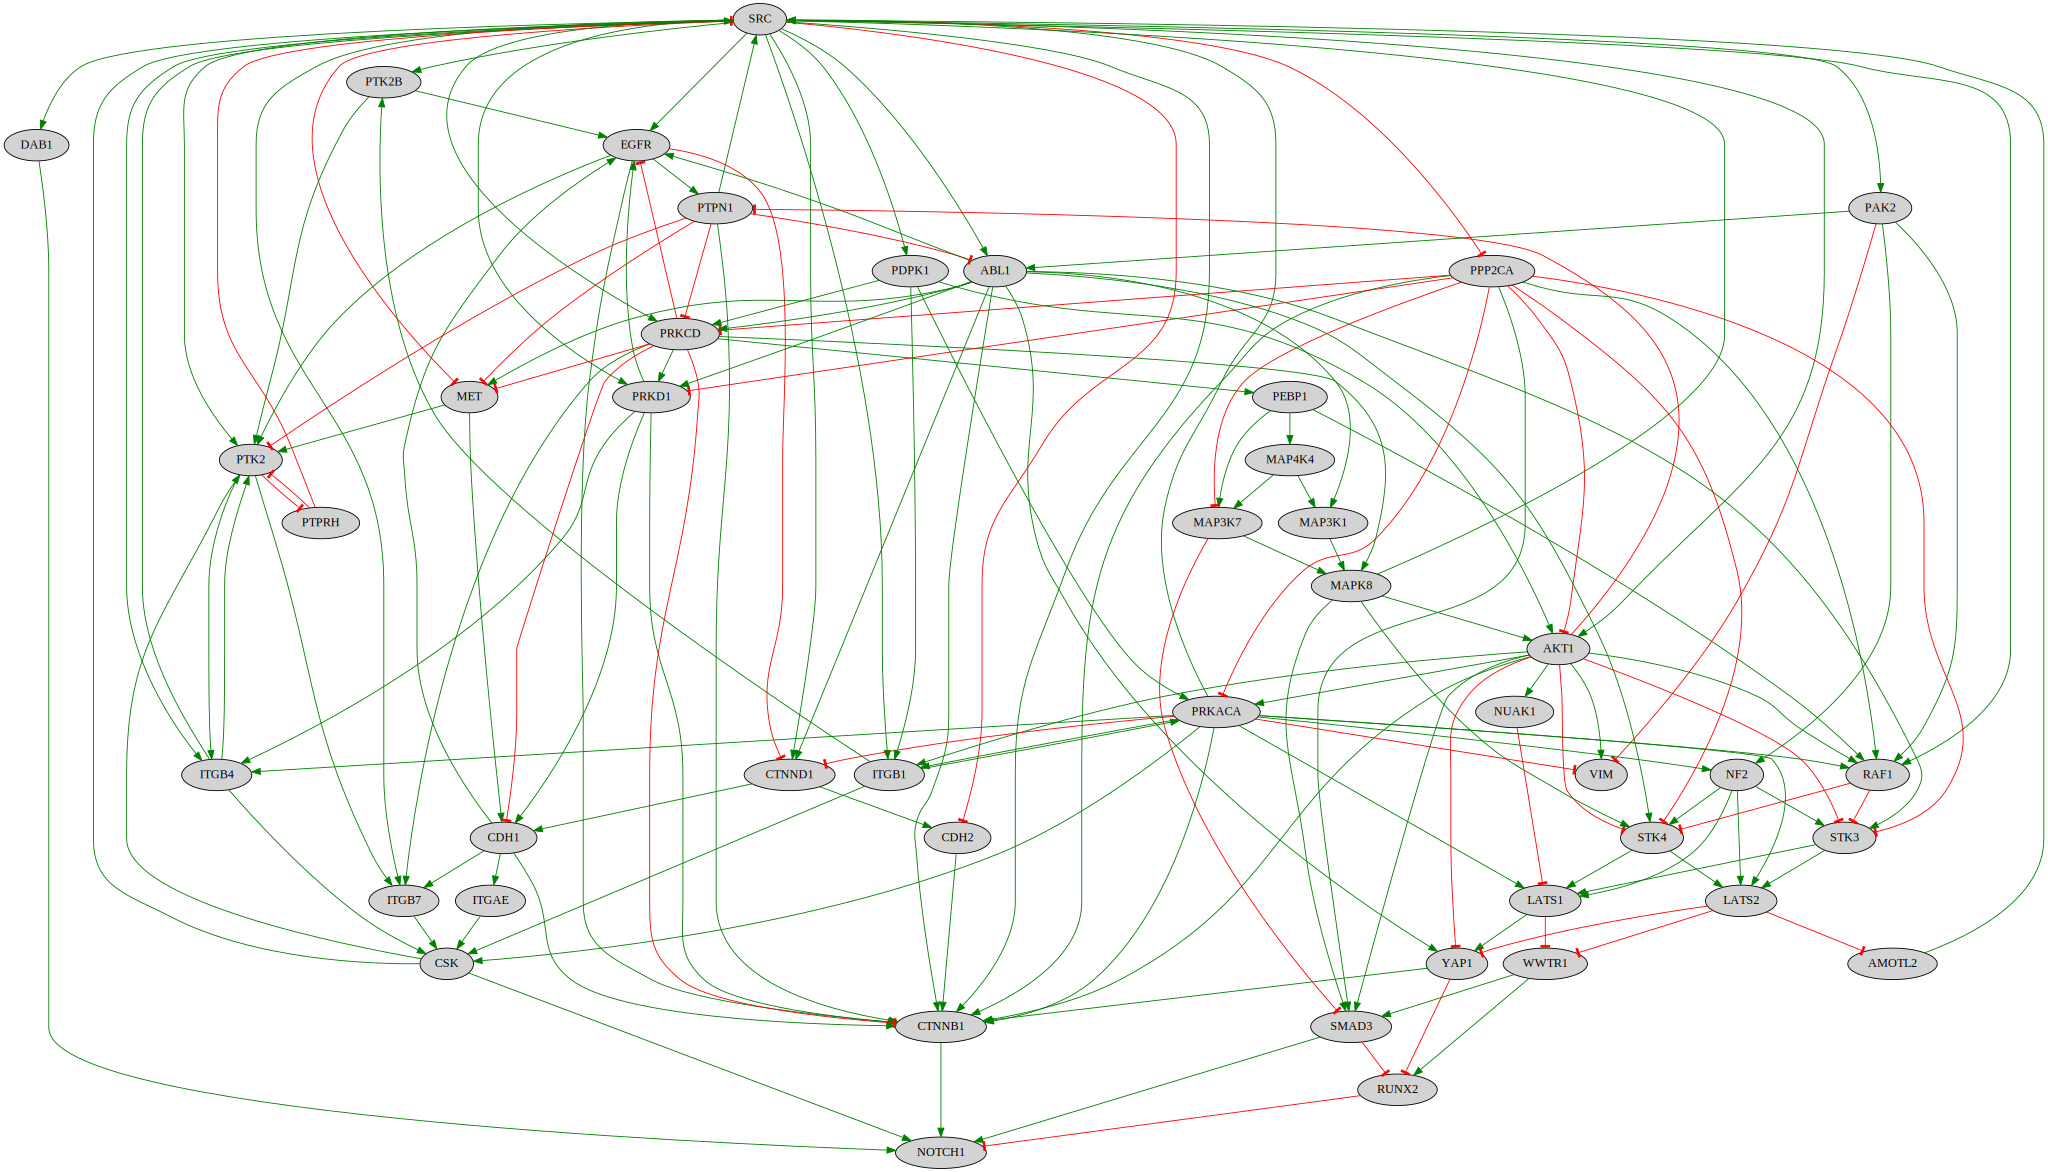

In [6]:
#Visualize network
visualizer1 = NetworkVisualizer(new_net1, color_by='effect')
visualizer1.render()

### 2. Connect to Gene Ontology (GO) term

Connect the nodes of the Network with markers of a certain phenotype, from Gene Ontology. 

The _connect_genes_to_phenotype_ function will look for interactions between the nodes of the network and genes annotated with a GO term of interest. The argument _compress_ replaces the individual phenotype-specific genes into one phenotype node.

<div class="alert alert-info">

**Note**
    
We suggest to the users to choose gene ontology terms lower in the hierarcy (e.g., execution phase of apoptosis _versus_ apoptosis) to avoid the inclusion of too many genes.

</div>  

In [11]:
%%time
new_net1.connect_genes_to_phenotype(id_accession="GO:0019985", phenotype="translesion synthesis", only_signed=True, compress=True, maxlen=1)

Start requesting genes from Gene Ontology
Fetching from:  https://golr-aux.geneontology.io/solr/select?defType=edismax&qt=standard&indent=on&wt=csv&rows=100000&start=0&fl=bioentity_label&facet=true&facet.mincount=1&facet.sort=count&json.nl=arrarr&facet.limit=25&hl=true&hl.simple.pre=%3Cem%20class=%22hilite%22%3E&hl.snippets=1000&csv.encapsulator=&csv.separator=%09&csv.header=false&csv.mv.separator=%7C&fq=document_category:%22annotation%22&fq=isa_partof_closure:%22GO:0019985%22&fq=taxon_subset_closure_label:%22Homo%20sapiens%22&fq=type:%22protein%22&fq=annotation_class_label:%22translesion%20synthesis%22&facet.field=aspect&facet.field=taxon_subset_closure_label&facet.field=type&facet.field=evidence_subset_closure_label&facet.field=regulates_closure_label&facet.field=isa_partof_closure_label&facet.field=annotation_class_label&facet.field=qualifier&facet.field=annotation_extension_class_closure_label&facet.field=assigned_by&facet.field=panther_family_label&q=*:*
Done
Starting connecting n

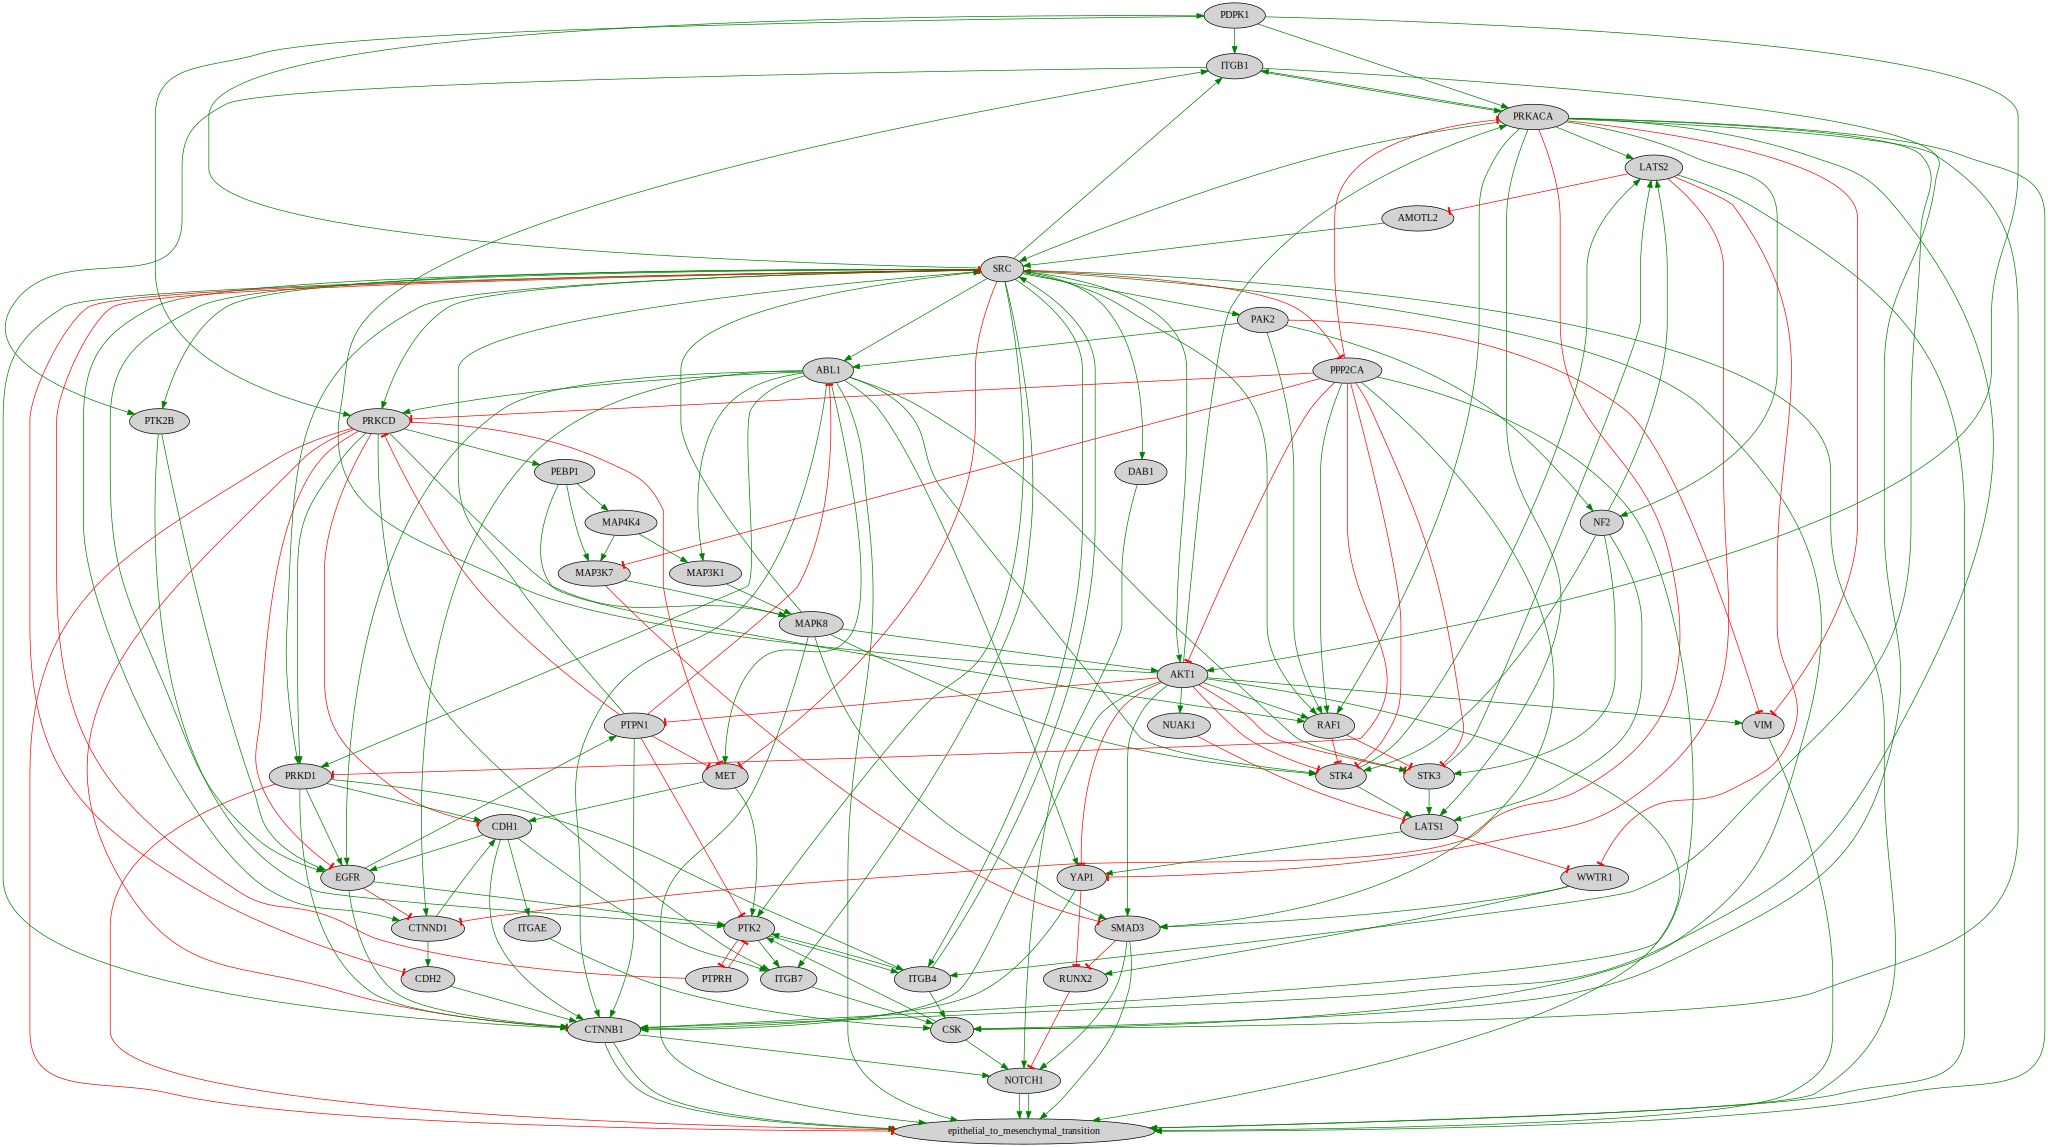

In [8]:
#Visualize network
visualizer1 = NetworkVisualizer(new_net1, color_by='effect')
visualizer1.render()

In [9]:
new_net1.edges

,source,target,Type,Effect,References
0,O15530,P05556,,stimulation,Adhesome:10896934
1,O15530,P17612,,stimulation,Adhesome:10698939;ELM:10698939;HPRD:10698939;L...
2,O15530,P31749,,stimulation,ACSN:15718470;ACSN:17680028;ACSN:18802401;ACSN...
3,O15530,Q05655,,stimulation,HPRD-phos:11381116;HPRD-phos:18669648;HPRD-pho...
4,O43318,P45983,,stimulation,HPRD:11865055;InnateDB:11865055;Macrophage:156...
...,...,...,...,...,...
165,Q9NRM7,Q9Y2J4,,inhibition,SIGNOR:24225952
166,Q9NRM7,epithelial_to_mesenchymal_transition,,stimulation,BioGRID:21952048;PhosphoSite:21952048;PhosphoS...
167,Q9Y2J4,P12931,,stimulation,SIGNOR:21937427
168,P46531,epithelial_to_mesenchymal_transition,NaN,stimulation,Gene Ontology
